# Kaggleのデータを使ってkerasを用いた画像認識

https://www.kaggle.com/alxmamaev/flowers-recognition<br>
上記のデータセットを使用。<br><br>


花の種類における画像認識のチャレンジです。<br>
「flowers」のフォルダにそれぞれ<b>「daisy」「dandelion」「rose」「sunflower」「tulip」</b>の5種類の画像。<br>
JupyterNotebookを使い、分析用のnotebookと画像フォルダを同じディレクトリに保存した状態で始めます。

## ①ライブラリのインポート

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import cv2
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
# 今回はtensorflow、kerasによるディープラーニングを使用し画像認識を行います。

## ②画像データの前処理

In [2]:
print(os.listdir('./flowers')) #画像データが入っているディレクトリを確認

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [3]:
# 各画像のディレクトリを指定
Daisy_dir = './flowers/daisy'
Sunflower_dir = './flowers/sunflower'
Tulip_dir = './flowers/tulip'
Dandelion_dir = './flowers/dandelion'
Rose_dir = './flowers/rose'

In [4]:
# 画像データを格納するための関数を実装
images = [] #画像のデータを格納する変数
labels = [] #画像ラベルを格納する変数
img_size = 150

def image_data(flower_name, DIR):
    for i in os.listdir(DIR):
        path = os.path.join(DIR,i) #画像のパスの読み込み
        img = cv2.imread(path) #画像の読み込み
        img = cv2.resize(img, (img_size, img_size)) #画像のリサイズ
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #RGBに変更
        images.append(np.array(img)) #画像データを格納
        labels.append(str(flower_name)) #画像ラベルを格納する

In [5]:
#各フォルダの画像を順番に格納
image_data('Daisy', Daisy_dir)
len(images)

769

In [6]:
image_data('Tulip', Tulip_dir)
len(images)

1753

In [7]:
image_data('Rose', Rose_dir)
len(images)

2537

In [8]:
image_data('Dandelion', Dandelion_dir)
len(images)

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [9]:
image_data('Sunflower', Sunflower_dir)
len(images)

4323

In [10]:
#処理したデータをまとめる
data = np.array(images)
labels = np.array(labels)
#データの型を確認
print('Input Data :', data.shape)
print('Output Data:', labels.shape)

Input Data : (4323, 150, 150, 3)
Output Data: (4323,)


## ③データの可視化と前処理の続き

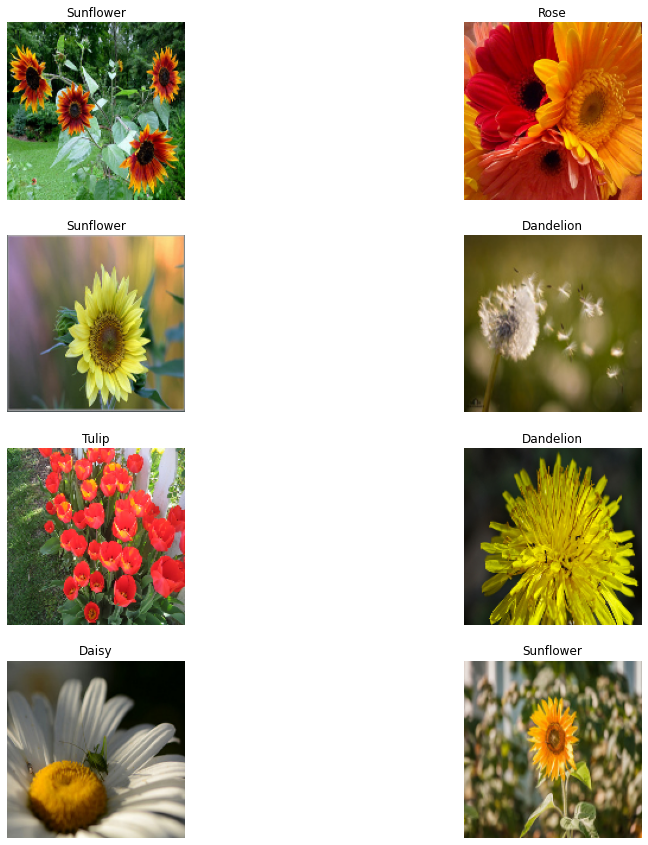

In [11]:
#ランダムで読み込んだ画像を表示して確認
fig, ax = plt.subplots(4, 2, figsize = (15, 15))
for i in range(4):
    for j in range(2):
        l = random.randint(0, data.shape[0])
        ax[i,j].imshow(data[l])
        ax[i,j].set_title(labels[l])
        ax[i,j].axis('off')

C:\Users\ritch\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of pictures')

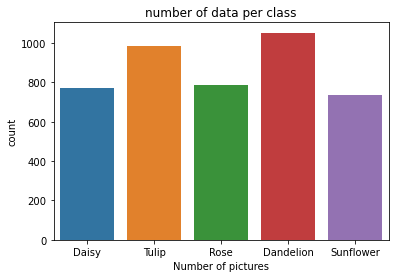

In [12]:
#各画像枚数のバランスを可視化して確認
sns.countplot(labels)
plt.title("number of data per class")
plt.xlabel("Number of pictures")

In [18]:
#訓練するためにラベルデータをワンホットエンコーディングで処理する
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y, 5) #kerasで処理
y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [20]:
#入力データの標準化して変数ｘに格納
print(data[0])
x = data / 255
print(x[0])

[[[136 136 134]
  [144 144 143]
  [147 147 147]
  ...
  [152 152 150]
  [154 154 152]
  [152 152 152]]

 [[134 134 132]
  [143 143 142]
  [146 146 146]
  ...
  [152 152 150]
  [153 153 151]
  [151 151 151]]

 [[134 134 131]
  [142 141 139]
  [146 144 145]
  ...
  [154 154 152]
  [151 151 150]
  [147 147 147]]

 ...

 [[ 44  47  26]
  [ 43  46  25]
  [ 44  47  26]
  ...
  [130 126 125]
  [129 125 124]
  [130 126 125]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 45  48  27]
  ...
  [131 127 127]
  [130 126 125]
  [129 126 124]]

 [[ 44  47  26]
  [ 44  47  26]
  [ 45  48  27]
  ...
  [132 128 127]
  [131 127 126]
  [131 127 126]]]
[[[0.53333333 0.53333333 0.5254902 ]
  [0.56470588 0.56470588 0.56078431]
  [0.57647059 0.57647059 0.57647059]
  ...
  [0.59607843 0.59607843 0.58823529]
  [0.60392157 0.60392157 0.59607843]
  [0.59607843 0.59607843 0.59607843]]

 [[0.5254902  0.5254902  0.51764706]
  [0.56078431 0.56078431 0.55686275]
  [0.57254902 0.57254902 0.57254902]
  ...
  [0.59607843 0.5960784

In [21]:
#訓練用とテスト用にデータを分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
#データの型を確認
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :" ,X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (3458, 150, 150, 3)
y_train shape : (3458, 5)
X_test shape : (865, 150, 150, 3)
y_test shape : (865, 5)


## ④モデルの構築と訓練（CNNの実装）

In [22]:
#ライブラリをインポート
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam

In [26]:
#モデルの構築
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(150,150,3)))
model.add(Activation('relu')) #活性化関数はrelu
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu')) 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5)) #前処理で設定したクラス
model.add(Activation('softmax'))

In [29]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 74, 74, 64)       

In [30]:
#データを拡張した上でトレーニングを行う
datagen = ImageDataGenerator(featurewise_center= False,
                              samplewise_center= False,
                              featurewise_std_normalization= False,
                              samplewise_std_normalization=False,
                              rotation_range= 10,        
                              zca_whitening=False,
                              zoom_range=0.2,
                              width_shift_range=0.2,     
                              height_shift_range=0.2,    
                              horizontal_flip=True,      
                              vertical_flip=False)       
                             
datagen.fit(X_train)

In [31]:
batch_size=32 #バッチサイズの指定
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (X_test,y_test),
                              verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
109/109 [==============================] - 76s 695ms/step - loss: 1.5248 - accuracy: 0.3571 - val_loss: 1.2629 - val_accuracy: 0.4555
Epoch 2/20
109/109 [==============================] - 75s 691ms/step - loss: 1.2609 - accuracy: 0.4534 - val_loss: 1.1978 - val_accuracy: 0.4775
Epoch 3/20
109/109 [==============================] - 77s 702ms/step - loss: 1.2157 - accuracy: 0.4933 - val_loss: 1.0281 - val_accuracy: 0.6127
Epoch 4/20
109/109 [==============================] - 75s 686ms/step - loss: 1.1002 - accuracy: 0.5480 - val_loss: 1.0103 - val_accuracy: 0.6127
Epoch 5/20
109/109 [==============================] - 74s 683ms/step - loss: 1.0328 - accuracy: 0.6032 - val_loss: 0.9453 - val_accuracy: 0.6046
Epoch 6/20
109/109 [==============================] - 75s 687ms/step - loss: 0.9674 - accuracy: 0.6243 - val_loss: 0.8241 - val_accuracy: 0.6636
Epoch 7/20
109/109 [==============================] - 

## ⑥結果の評価

Text(0, 0.5, 'Accuracy')

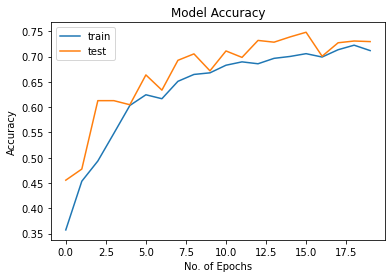

In [33]:
#Accuracyの推移を可視化
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

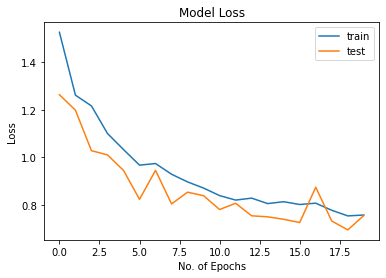

In [34]:
#Lossの評価の推移を可視化
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train', 'test'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [44]:
print('20epoch目のaccuracy(訓練): ', history.history['accuracy'][19])
print('20epoch目のaccuracy(検証）: ', history.history['val_accuracy'][19])
print('20epoch目のloss(訓練): ', history.history['loss'][19])
print('20epoch目のloss(検証): ', history.history['val_loss'][19])

20epoch目のaccuracy(訓練):  0.7116830348968506
20epoch目のaccuracy(検証）:  0.7294797897338867
20epoch目のloss(訓練):  0.7581853270530701
20epoch目のloss(検証):  0.7559974789619446


In [43]:
#モデルの保存（転移学習などで使うため）
model.save('flowers_cnn.h5')

適合度、ロスともに汎化性能があることを示しています。<br>
順調に学習できていることがグラフからも読み取れます。<br><br>

決して、評価の数値が高いわけではありませんが、<br>訓練とテストデータによる予測は順当なので学習はここまでにします。<br>
さらに、性能を上げるするのであれば、<br><b>「データの拡張」・「モデルの変更」</b>などが必要になるでしょう。<br><br>
拙いものではございますが、参考になれば幸いです。